<a href="https://colab.research.google.com/github/JJungEEun/2023_DaconStudy/blob/main/KBO%20%ED%83%80%EC%9E%90%20OPS%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%EC%A0%95%EC%9D%80/03)modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
cd /content/drive/MyDrive/2023/데이콘/KBO 타자 OPS 예측 경진대회/data

/content/drive/MyDrive/2023/데이콘/KBO 타자 OPS 예측 경진대회/data


In [4]:
regular = pd.read_csv('Regular_Season_Batter_pre(2).csv')
pre = pd.read_csv('Pre_Season_Batter_pre(2).csv')

In [5]:
regular

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,OBP,E,height/weight,year_born,OPS,외국인,age,age_category,weight,weight_category
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.383,9,177cm/93kg,1985,0.902,0,33,2,93,2
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,1,180cm/72kg,1992,0.000,1,19,0,72,0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.337,6,180cm/72kg,1992,0.686,1,22,0,72,0
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.348,15,180cm/72kg,1992,0.673,1,23,1,72,0
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.232,7,180cm/72kg,1992,0.489,1,24,1,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0.000,0,181cm/82kg,1989,0.000,1,25,1,82,1
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0.000,0,181cm/82kg,1989,0.000,1,26,1,82,1
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0.000,0,181cm/82kg,1989,0.000,1,27,1,82,1
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,0.359,4,181cm/82kg,1989,0.761,1,28,1,82,1


In [6]:
pre

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,OBP,E,height/weight,year_born,OPS,외국인,weight,weight_category,age,age_category
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.409,1,177cm/93kg,1985,0.959,0.0,93,2,33,2
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.500,0,180cm/72kg,1992,0.500,1.0,72,0,19,0
2,1,강경학,2014,한화,-,4,0,2,0,0,...,NaN,0,180cm/72kg,1992,NaN,1.0,72,0,22,0
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.286,2,180cm/72kg,1992,0.416,1.0,72,0,23,1
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.212,0,180cm/72kg,1992,0.493,1.0,72,0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0.448,1,183cm/96kg,1987,1.041,1.0,96,3,27,1
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0.389,0,183cm/96kg,1987,0.822,1.0,96,3,28,1
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0.370,1,183cm/96kg,1987,0.799,1.0,96,3,29,2
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0.333,3,183cm/96kg,1987,0.833,1.0,96,3,31,2


In [12]:
correlations = regular.corr()['OPS'].sort_values()

print("상관관계 상위 10개")
print(correlations.tail(10))
print("상관관계 하위 10개")
print(correlations.head(10))

상관관계 상위 10개
AB     0.546879
2B     0.556933
R      0.558242
H      0.571506
RBI    0.576652
TB     0.589841
avg    0.919696
OBP    0.935797
SLG    0.971387
OPS    1.000000
Name: OPS, dtype: float64
상관관계 하위 10개
year_born         -0.138832
외국인               -0.108581
batter_id         -0.039554
year               0.054094
weight             0.134462
weight_category    0.152712
age_category       0.200940
age                0.217275
SB                 0.240282
3B                 0.269084
Name: OPS, dtype: float64


Text(0.5, 1.0, 'Top 10 correlations with OPS')

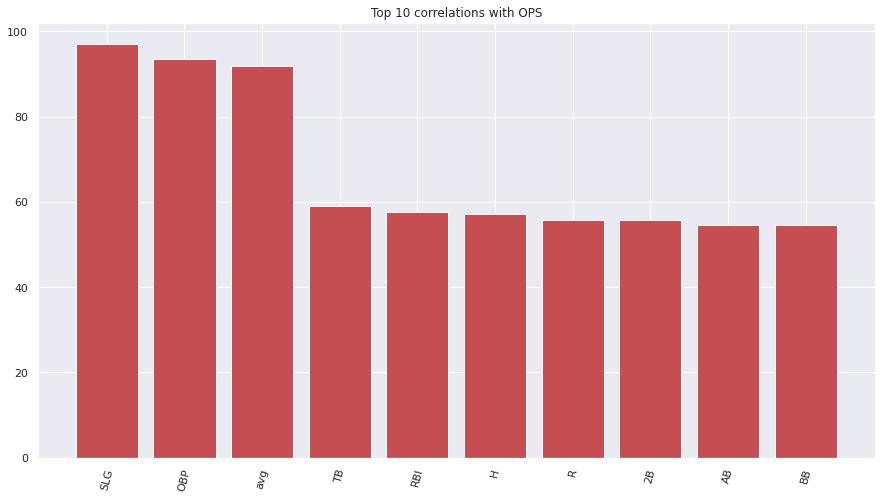

In [16]:
sns.set(style='darkgrid')

plt.figure(figsize=(15,8))

plt.bar(correlations.tail(11)[:-1].index.astype(str)[::-1], 100*correlations.tail(11)[:-1][::-1],color='r')
plt.xticks(rotation=75)
plt.title('Top 10 correlations with OPS')

Text(0.5, 1.0, 'Low 8 correlations with OPS')

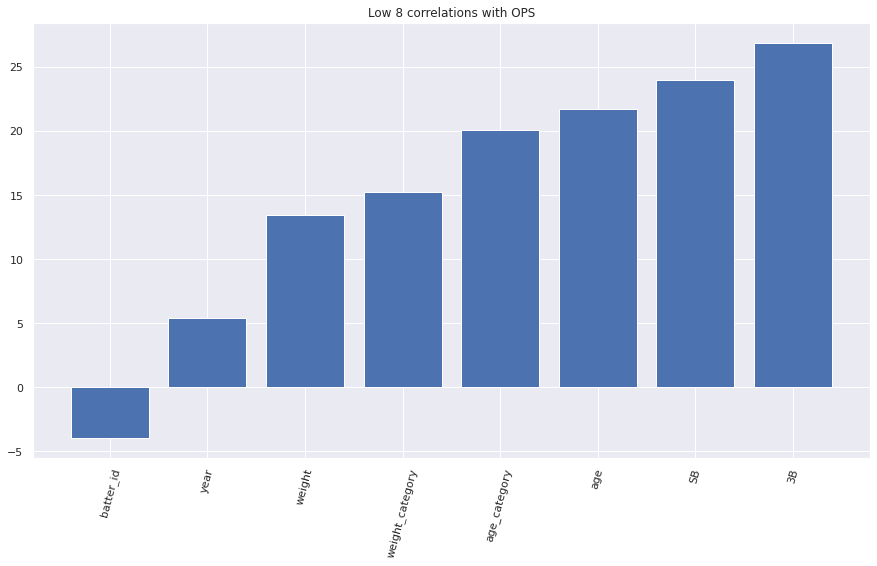

In [18]:
plt.figure(figsize=(15,8))

plt.bar(correlations.head(10)[2:].index.astype(str), 100*correlations.head(10)[2:])
plt.xticks(rotation=75)
plt.title('Low 8 correlations with OPS')

In [137]:
df = regular[['HBP', 'GDP', 'SO', 'HR','G', 'BB', 'AB','2B', 'R', 'H', 'RBI', 'TB', 'avg', 'OBP', 'SLG','OPS','year']]

In [25]:
# 모델 모듈
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [65]:
def data_split(data):

  X_train = data[(data['year']<2017)]
  X_test = data[(data['year']>=2017)]
  y_train = data[(data['year']<2017)]['OPS']
  y_test = data[(data['year']>=2017)]['OPS']
  y_test= y_test.reset_index(drop=True)

  return X_train, X_test, y_train, y_test

In [66]:
model_dict = {'xgb':XGBRegressor(),
              'lgbm':LGBMRegressor(),
              'rf':RandomForestRegressor(),
              'svr':SVR(),
              'knn':KNeighborsRegressor(),
              'reg':LinearRegression(),
              'ridge':Ridge(),
              'lasso':Lasso()}

In [67]:
df.isna().sum()

HBP     0
GDP     0
SO      0
HR      0
G       0
BB      0
AB      0
2B      0
R       0
H       0
RBI     0
TB      0
avg     0
OBP     0
SLG     0
OPS     0
year    0
dtype: int64

In [49]:
df = df.fillna(0)

In [68]:
X_train, X_test, y_train, y_test = data_split(df)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2010, 17) (444, 17) (2010,) (444,)


In [69]:
for model in model_dict:
  model_dict[model].fit(X_train, y_train)
  y_predict =  model_dict[model].predict(X_test)

  print(model, np.sqrt(mean_squared_error(y_test, y_predict)))

[05:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb 0.0032829715514817457
lgbm 0.01724920869771955
rf 0.0030402143366623307
svr 0.16541827692245784
knn 0.09444313000156783
reg 1.0696264862079177e-15
ridge 0.01063750434581861
lasso 0.17937175323137058


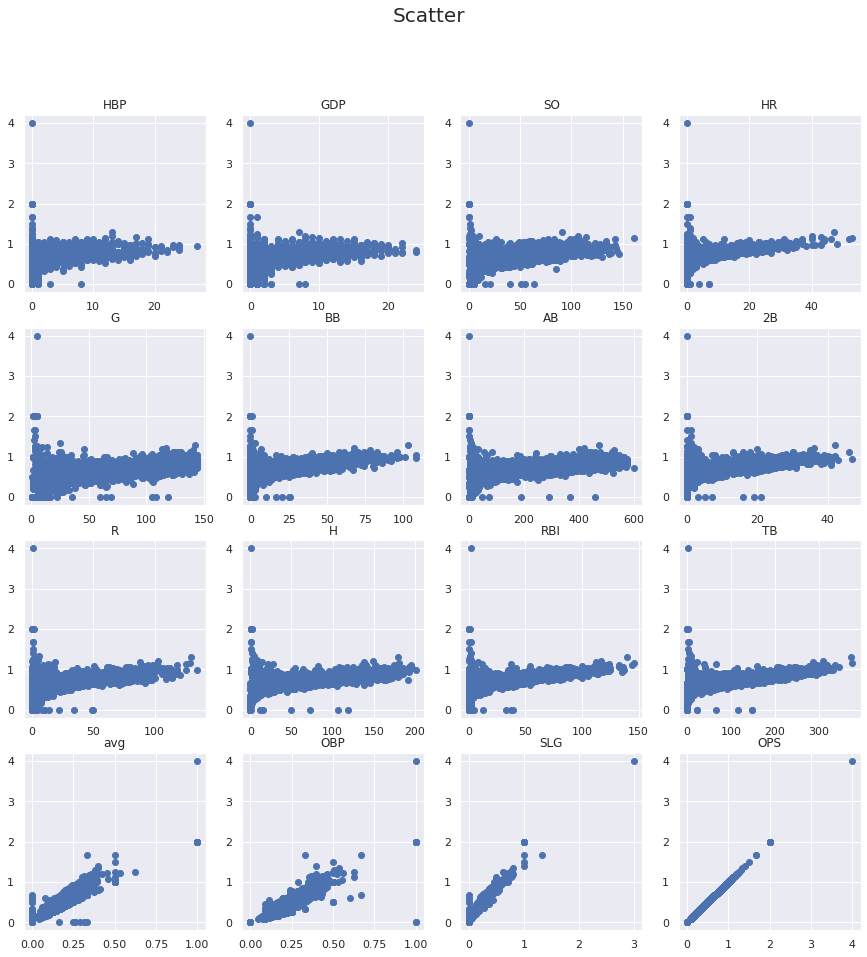

In [96]:
feature = df.columns

plt.figure(figsize=(15,15))
plt.suptitle("Scatter", fontsize=20)

for i in range(len(feature)-1):
    plt.subplot(4,4,i+1)
    plt.title(feature[i])
    plt.scatter(df[feature[i]], df['OPS'])
plt.show()

In [138]:
sorted(df['avg'].unique())

[0.0,
 0.03,
 0.04,
 0.045,
 0.048,
 0.056,
 0.063,
 0.067,
 0.071,
 0.074,
 0.077,
 0.079,
 0.083,
 0.087,
 0.091,
 0.092,
 0.095,
 0.097,
 0.1,
 0.103,
 0.105,
 0.108,
 0.111,
 0.114,
 0.115,
 0.118,
 0.119,
 0.12,
 0.121,
 0.122,
 0.124,
 0.125,
 0.127,
 0.128,
 0.129,
 0.13,
 0.133,
 0.135,
 0.136,
 0.1369999999999999,
 0.138,
 0.139,
 0.14,
 0.143,
 0.146,
 0.147,
 0.148,
 0.149,
 0.15,
 0.151,
 0.152,
 0.154,
 0.155,
 0.156,
 0.157,
 0.158,
 0.159,
 0.16,
 0.161,
 0.162,
 0.163,
 0.1639999999999999,
 0.165,
 0.1669999999999999,
 0.168,
 0.1689999999999999,
 0.17,
 0.171,
 0.172,
 0.173,
 0.174,
 0.175,
 0.176,
 0.177,
 0.178,
 0.179,
 0.18,
 0.181,
 0.182,
 0.183,
 0.184,
 0.185,
 0.186,
 0.188,
 0.189,
 0.19,
 0.191,
 0.192,
 0.193,
 0.194,
 0.195,
 0.196,
 0.197,
 0.198,
 0.199,
 0.2,
 0.201,
 0.202,
 0.203,
 0.204,
 0.205,
 0.206,
 0.207,
 0.208,
 0.209,
 0.21,
 0.211,
 0.212,
 0.213,
 0.214,
 0.215,
 0.216,
 0.217,
 0.218,
 0.219,
 0.22,
 0.221,
 0.222,
 0.223,
 0.224,
 0.225

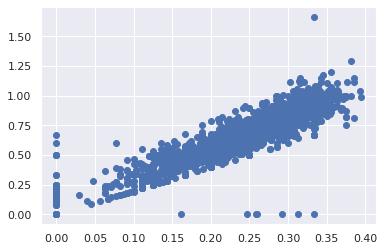

In [143]:
outlier = df[df['avg']>=0.4].index
df1 = df.drop(outlier, axis=0)

plt.scatter(x=df1['avg'],y=df1['OPS'])

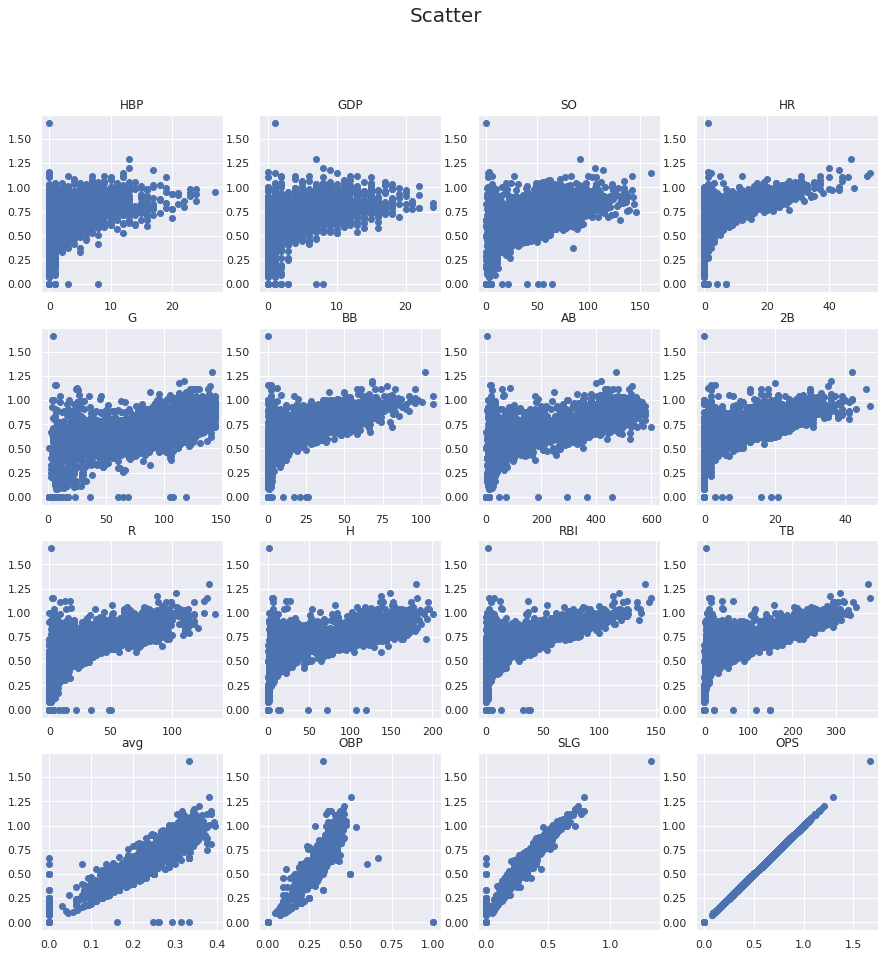

In [144]:
feature = df.columns

plt.figure(figsize=(15,15))
plt.suptitle("Scatter", fontsize=20)

for i in range(len(feature)-1):
    plt.subplot(4,4,i+1)
    plt.title(feature[i])
    plt.scatter(df1[feature[i]], df1['OPS'])
plt.show()

In [146]:
print(df1.shape) # 2454 -> 2421

(2421, 17)


In [147]:
X_train, X_test, y_train, y_test = data_split(df1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1980, 17) (441, 17) (1980,) (441,)


In [148]:
model_dict['reg'].fit(X_train, y_train)
y_predict =  model_dict['reg'].predict(X_test)

print('reg', np.sqrt(mean_squared_error(y_test, y_predict)))

reg 6.171932464179447e-16
